In [110]:
import random
import numpy as np
import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn import tree
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from numpy import percentile
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer
from sklearn.metrics import confusion_matrix
from numpy import percentile
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import normalize
import matplotlib.pyplot as plt
from sklearn import datasets, metrics
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
#from tabulate import tabulate
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_validate
from sklearn.metrics import roc_curve
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import roc_auc_score

In [82]:
df_final = pd.read_csv('waveletsym12_Prueba.csv')
target = df_final['target']
df_final = df_final.drop(df_final.columns[[0,373]], axis='columns')


X= df_final
y= target
numCV = 9

rng = np.random.RandomState(0)
sss = StratifiedShuffleSplit(n_splits=2, test_size=0.28, random_state=rng)

for train_index, test_index in sss.split(X, y):
    
    X_train, X_test = X.loc[train_index,:], X.loc[test_index,:]
    y_train, y_test = y.loc[train_index], y.loc[test_index]


num = 94



In [83]:
random.seed(527)

cache_dir = "."
pipelineKNN = make_pipeline(StandardScaler(),SelectKBest(k=num),
                         KNeighborsClassifier(n_neighbors=15), memory=cache_dir)
pipelineKNN.fit(X_train, y_train)
predsKNN = pipelineKNN.predict(X_test)


scoresKNN = cross_val_score(pipelineKNN, X_train, y_train, cv=numCV)
quartilesKNN = percentile(scoresKNN, [25, 50, 75])
avKNN = scoresKNN.mean()
minKNN, maxKNN = scoresKNN.min(), scoresKNN.max()


accKNN=accuracy_score(y_test, predsKNN)
accKNN= accKNN*100
tnKNN, fpKNN, fnKNN, tpKNN = confusion_matrix(y_test, predsKNN).ravel()
SensKNN = (tpKNN/(tpKNN+fnKNN))*100
SpeciKNN = (tnKNN/(tnKNN+fpKNN))*100



In [84]:
random.seed(527)
pipelineNB = make_pipeline(StandardScaler(),SelectKBest(k=num),
                         BernoulliNB(alpha = 0.1, binarize = 0.45))
pipelineNB.fit(X_train, y_train)
predsNB = pipelineNB.predict(X_test)


modelNB = BernoulliNB(alpha = 0.1, binarize = 0.45)
scoresNB = cross_val_score(pipelineNB, X_train, y_train, cv=numCV)
quartilesNB = percentile(scoresNB, [25, 50, 75])
avNB = scoresNB.mean()
minNB, maxNB = scoresNB.min(), scoresNB.max()


accNB=accuracy_score(y_test, predsNB)
accNB= accNB*100
tnNB, fpNB, fnNB, tpNB = confusion_matrix(y_test, predsNB).ravel()
SensNB = (tpNB/(tpNB+fnNB))*100
SpeciNB = (tnNB/(tnNB+fpNB))*100


In [85]:
random.seed(527)
pipelineADA = make_pipeline(StandardScaler(), SelectKBest(k=num),
                         AdaBoostClassifier(n_estimators=150, random_state=0))
pipelineADA.fit(X_train, y_train)
predsADA = pipelineADA.predict(X_test)


scoresADA= cross_val_score(pipelineADA, X_train, y_train,cv=numCV)
quartilesADA = percentile(scoresADA, [25, 50, 75])
avADA = scoresADA.mean()
minADA, maxADA = scoresADA.min(), scoresADA.max()


accADA=accuracy_score(y_test, predsADA)
accADA= accADA*100
tnADA, fpADA, fnADA, tpADA = confusion_matrix(y_test, predsADA).ravel()
SensADA = (tpADA/(tpADA+fnADA))*100
SpeciADA = (tnADA/(tnADA+fpADA))*100

In [86]:
random.seed(527)
pipelineRF = make_pipeline(StandardScaler(),SelectKBest(k=num),
                         RandomForestClassifier(n_estimators=150, random_state=0))
pipelineRF.fit(X_train, y_train)
predsRF = pipelineRF.predict(X_test)


scoresRF = cross_val_score(pipelineRF, X_train, y_train, cv=numCV)
quartilesRF = percentile(scoresRF, [25, 50, 75])
avRF = scoresRF.mean()
minRF, maxRF = scoresRF.min(), scoresRF.max()

accRF=accuracy_score(y_test, predsRF)
accRF= accRF*100
tnRF, fpRF, fnRF, tpRF = confusion_matrix(y_test, predsRF).ravel()
SensRF = (tpRF/(tpRF+fnRF))*100
SpeciRF = (tnRF/(tnRF+fpRF))*100

In [91]:
random.seed(527)
pipelineGBC = make_pipeline(StandardScaler(),SelectKBest(k=num),
                         GradientBoostingClassifier(random_state=0, n_estimators=50))
pipelineGBC.fit(X_train, y_train)
predsGBC = pipelineGBC.predict(X_test)


scoresGBC = cross_val_score(pipelineGBC, X_train, y_train, cv=numCV)
quartilesGBC = percentile(scoresGBC, [25, 50, 75])
avGBC = scoresGBC.mean()
minGBC, maxGBC = scoresGBC.min(), scoresGBC.max()


accGBC=accuracy_score(y_test, predsGBC)
accGBC= accGBC*100
tnGBC, fpGBC, fnGBC, tpGBC = confusion_matrix(y_test, predsGBC).ravel()
SensGBC = (tpGBC/(tpGBC+fnGBC))*100
SpeciGBC = (tnGBC/(tnGBC+fpGBC))*100

In [88]:
random.seed(527)
pipelineSVM = make_pipeline(StandardScaler(),SelectKBest(k=num),
                        LinearSVC(random_state=rng))
pipelineSVM.fit(X_train, y_train)
predsSVM = pipelineSVM.predict(X_test)

scoresSVM = cross_val_score(pipelineSVM, X_train, y_train, cv=numCV)
quartilesSVM = percentile(scoresSVM, [25, 50, 75])
avSVM = scoresSVM.mean()
minSVM, maxSVM = scoresSVM.min(), scoresSVM.max()


accSVM=accuracy_score(y_test, predsSVM)
accSVM= accSVM*100
tnSVM, fpSVM, fnSVM, tpSVM = confusion_matrix(y_test, predsSVM).ravel()
SensSVM = (tpSVM/(tpSVM+fnSVM))*100
SpeciSVM = (tnSVM/(tnSVM+fpSVM))*100

In [89]:
random.seed(527)
pipelineGLMNET = make_pipeline(StandardScaler(),SelectKBest(k=num),
                        LogisticRegression(random_state=0))
pipelineGLMNET.fit(X_train, y_train)
predsGLMNET = pipelineGLMNET.predict(X_test)

scoresGLMNET = cross_val_score(pipelineGLMNET, X_train, y_train, cv=numCV)
quartilesGLMNET = percentile(scoresGLMNET, [25, 50, 75])
avGLMNET = scoresGLMNET.mean()
minGLMNET, maxGLMNET = scoresGLMNET.min(), scoresGLMNET.max()


accGLMNET=accuracy_score(y_test, predsGLMNET)
accGLMNET= accGLMNET*100
tnGLMNET, fpGLMNET, fnGLMNET, tpGLMNET = confusion_matrix(y_test, predsGLMNET).ravel()
SensGLMNET = (tpGLMNET/(tpGLMNET+fnGLMNET))*100
SpeciGLMNET = (tnGLMNET/(tnGLMNET+fpGLMNET))*100

In [92]:
Results = {'Model': ['KNN', 
                 'NB', 
                 'ADA',
                'RF', 'GBC', 'SVM','LogisticR'],
         'Accuracy': [accKNN,accNB, accADA, accRF, accGBC, accSVM, accGLMNET], 
         'Sensitivity':[SensKNN,SensNB, SensADA, SensRF, SensGBC, SensSVM, SensGLMNET],
        'Specificity':[SpeciKNN,SpeciNB, SpeciADA, SpeciRF, SpeciGBC, SpeciSVM, SpeciGLMNET],
          'Accuracy_CV': [avKNN,avNB, avADA, avRF, avGBC, avSVM, avGLMNET], 
         'Min':[minKNN,minNB, minADA, minRF, minGBC, minSVM, minGLMNET],
        'Max':[maxKNN,maxNB, maxADA, maxRF, maxGBC, maxSVM, maxGLMNET],
        'q1':[quartilesKNN[0],quartilesNB[0],quartilesADA[0],quartilesRF[0],quartilesGBC[0],quartilesSVM[0],quartilesGLMNET[0]],
          'q2':[quartilesKNN[1],quartilesNB[1],quartilesADA[1],quartilesRF[1],quartilesGBC[1],quartilesSVM[1],quartilesGLMNET[1]],
          'q3':[quartilesKNN[2],quartilesNB[2],quartilesADA[2],quartilesRF[2],quartilesGBC[2],quartilesSVM[2],quartilesGLMNET[2]]
          }

df_results = pd.DataFrame(Results)
df_results

,Model,Accuracy,Sensitivity,Specificity,Accuracy_CV,Min,Max,q1,q2,q3
0,KNN,72.727273,54.545455,90.909091,0.537037,0.166667,0.833333,0.500000,0.500000,0.666667
1,NB,77.272727,72.727273,81.818182,0.611111,0.166667,0.833333,0.500000,0.666667,0.666667
2,ADA,90.909091,81.818182,100.000000,0.777778,0.500000,1.000000,0.666667,0.833333,1.000000
3,RF,86.363636,81.818182,90.909091,0.777778,0.500000,1.000000,0.666667,0.833333,0.833333
4,GBC,90.909091,90.909091,90.909091,0.814815,0.500000,1.000000,0.666667,0.833333,1.000000
5,SVM,72.727273,63.636364,81.818182,0.740741,0.500000,1.000000,0.666667,0.666667,0.833333
6,LogisticR,72.727273,63.636364,81.818182,0.777778,0.500000,1.000000,0.666667,0.833333,1.000000


In [93]:
CF = pd.crosstab(y_test, predsGBC, rownames=['Actual'], colnames=['Predicted'])
print (CF)

Predicted   0   1
Actual           
0          10   1
1           1  10


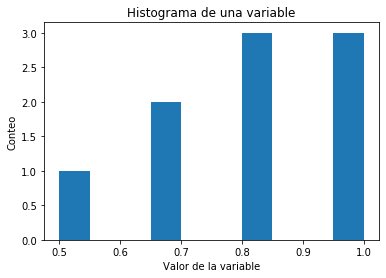

In [119]:
from numpy.random import seed, randn
import matplotlib.pyplot as plt
# Configuro la semilla aleatoria
seed(1993)
# Genero 100 muestras

# Represento el histograma
plt.hist(scoresGBC)
plt.title('Histograma de una variable')
plt.xlabel('Valor de la variable')
plt.ylabel('Conteo')
plt.show()






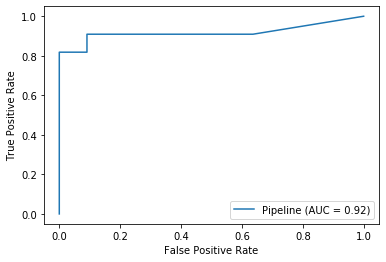

In [101]:
metrics.plot_roc_curve(pipelineGBC, X_test, y_test)  


In [108]:
scoresGBC

array([0.66666667, 0.83333333, 1.        , 1.        , 1.        ,
       0.83333333, 0.5       , 0.66666667, 0.83333333])

array([0. , 0.5, 1. ])

array([nan, nan, nan])